# Problem 1: A Bayesian Example

A medical testing company has developed a two-stage, non-invasive test for Down’s syndrome in the first two months of pregnancy. Initial tests have shown that when the fetus actually has Down’s syndrome, the test correctly identifies this by giving a positive result 98% of the time (i.e. the observed probability of a false negative is 2%). Furthermore, in cases when the fetus does not have Down’s syndrome, the test result is negative 97% of the time (i.e. the observed probability of a false positive is 3%). Armed with this data, the company’s statisticians are charged with estimating the overall probability that a given fetus has Down’s syndrome if the test shows positive. Assume the observed probability of Down’s syndrome in a random sample from a large number of observations is about 1 in 1,200 (this is the reported value for a 25-year-old mother; the risk is higher for older mothers).

## A.

Using Bayes’ theorem, estimate the overall probability that a given fetus has Down’s syndrome if the test shows positive. Are you surprised by the answer? What is the fundamental problem with this test? How accurate would the test have to be to achieve a 50% probability of having the disease if the test showed a positive result? (For the last one, experiment with the accuracies of both the positive and negative test results.)

## Answer 

According to the Bayes' theorem
$$P(H|E)=P(E|H)*P(H)/P(E)$$
Where 

<font color = 'red'>For positive results: <font color = 'black'>

P(H|E)=probability that given fetus has syndrome when test shows positive

P(E|H)= probability that test shows positive when given fetus has syndrome=$0.98$

P(H)=probability that some one have a syndrome=1/1200

P(E)=probability that have a positive result=0.98/1200+0.02*1199/1200

In [1]:
print('Probability that a given fetus has Downs syndrome if test shows positive=',(0.98/1200)/(0.98/1200+0.02*1199/1200))

Probability that a given fetus has Downs syndrome if test shows positive= 0.03926282051282051


The result was suprisingly low than my expectation. The fundamental problem is that the calculated results from the given condition is actually much lower than our expected.

To reach 50% accuracy, we have the equation from above as:
$$ 0.5=(x/1200)/(x/1200+(1-x)*1199/1200)$$
Where x = ture positive probability from the test

Solving the equation we get x=1199/1200 is the accuracy we need to achieve 50% probability for pos result

For the negative one we also have the equation as:
$$0.5=(x*1199/1200)/(x*1199/1200+(1-x)/1200)$$
Where x = ture positive probability from the test

Solving the equation we get x=1/1200 is the accuracy we need to achieve 50% probability for neg result

## B.

Estimate the likelihood that the fetus does not have Down’s Syndrome if the test shows a negative result. Is the test more useful in this framework as a screening step when trying to decide to use more accurate (but also more invasive) tests?

Using the same equation from A we have:
$$P(H|E)=P(E|H)*P(H)/P(E)$$
Where 

<font color = 'red'>For negative results: <font color = 'black'>

P(H|E)=probability that given fetus doen't have syndrome when test shows negative

P(E|H)= probability that test shows negative when given fetus doesn't have syndrome=$0.97$

P(H)=probability that some one don't have a syndrome=1199/1200

P(E)=probability that have a negative result=0.97 * 1199/1200+0.03*1/1200

In [2]:
print('Probability that a given fetus dont have Downs syndrome if test shows negative=',(0.97*1199/1200)/(0.97*1199/1200+0.03*1/1200))

Probability that a given fetus dont have Downs syndrome if test shows negative= 0.9999742059738964


From the result, this test is more useful during the screening processes.

## C.

Finally, draw a tree diagram for this problem.

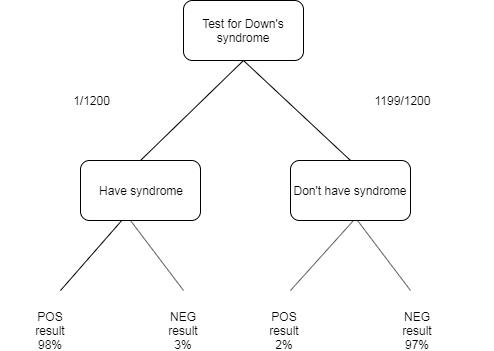

In [3]:
from IPython.display import Image
Image(filename='Tree diagram.png')

# Problem 2: Continuous Bayesian Estimation of Flood Frequency

Data:	
NYC_precip_priors.xlsx
Based on long-term climate records, the 24-hour duration, 100-year return period rainfall in New York City was previously estimated at 7.2 inches. 100-year rainfall indicates a storm with a rainfall total that would on average be met or exceeded only once every 100 years. In a given year, the storm has a 0.01 chance of occurrence, i.e., for any k-year storm, its probability of occurrence in one year is 1/k, where k is the return period. In fact, during the 20th century, this total was exceeded only once, during Hurricane Floyd in 1999. However, a storm in 2007 produced 8 inches of rainfall in a 24-hour period. Another storm in August 2011 again exceeded the 7.2-inch total. Hurricane Irene in September 2011 exceeded the total yet again, and so did Hurricane Sandy in October 2012. This happened again in September 2018 from Hurricane Florence. [Note that in 2019, there was flooding in July, but not of this magnitude. Also, subtropical Storm Melissa brought minor flooding to the New York coastline on 11 October 2019 but not of this magnitude. Therefore, we will not update the number of floods in 2019 but will instead add one more year without a flood.]

In this problem we will use Bayes’ Theorem to estimate the probability that the 7.2-inch storm is no longer the 100-year storm, that is, the probability that 7.2 inches of rainfall in a 24-hour period is likely to occur more often than every 100 years. In this problem, A is the true likelihood of the storm’s occurrence, and B are the events we have observed. [Note that unlike what you will do in many hydrology classes, which is to calculate the return period across a range of different precipitation or streamflow values, we are focusing here only on the probability of 24-hour storms exceeding 7.2 inches of rainfall because this is a critical design number for New York City.]

## A.

Download and plot the prior likelihood of a >=7.2-inch storm occurring in a given year from the data file “NYC_precip_priors” (.xslx or .mat). This dataset shows the prior distribution of the likelihood of the 7.2-inch storm in a given year, with mean p = 0.01. Note that the variable labeled “pdf” represents the probability of the storm frequency or return interval falling within that interval (value noted and the next value) and therefore includes the interval width, such that the sum of the pdf values alone sums to 1, and cumulative sum of the pdf is the cdf. Note that there is some uncertainty about the original likelihood. What are the mean and 95% confidence interval of the probability, i.e., where does 95% of the PDF fall between? To what k-year storm (expected return period) range do these values correspond?

In [4]:
import numpy as np
import scipy.stats as st
import statistics as stats
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [10]:
df=pd.read_excel('NYC_precip_priors.xlsx')
df=df.iloc[:,:3]

In [11]:
df.head()

,PDF,Storm Probability,Return Period (years)
0,0.038961,0.000,NaN
1,0.038922,0.001,1000.000000
2,0.038786,0.002,500.000000
3,0.038554,0.003,333.333333
4,0.038228,0.004,250.000000


Text(0.5,1,'PDF for the 7.2-inch storm')

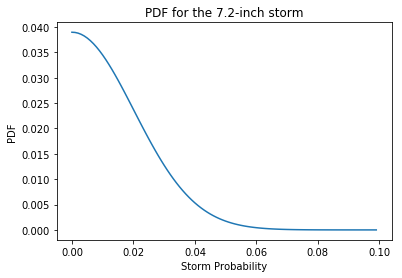

In [13]:
plt.plot(df['Storm Probability'],df['PDF'])
plt.xlabel('Storm Probability')
plt.ylabel('PDF')
plt.title('PDF for the 7.2-inch storm')

In [18]:
x=np.array(df['Storm Probability'])
cdf = (x[1] - x[0]) * np.cumsum(df['PDF'])

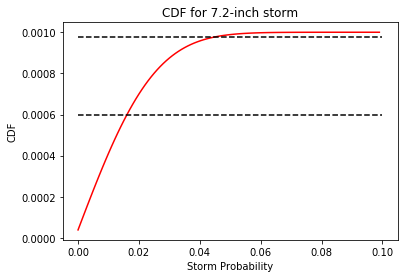

In [30]:
# Look for 95% Confidence intervals
#[0.038961,0.1]is given as the PDF range
#for 0.038961-0.1, 95% range is [0.000025,0.000975]

plt.figure()
plt.plot(x, cdf, 'r')
plt.xlabel('Storm Probability')
plt.ylabel('CDF')
plt.title('CDF for 7.2-inch storm')
plt.plot([0,0.1],[0.0006, 0.0006], 'k--')
plt.plot([0,0.1],[0.000975, 0.000975], 'k--')

## B.

At each time period of interest, count the number of times the threshold has been exceeded and the number of years, beginning with the period 1900-1999. The likelihood P(B|A = p) that the storm would be exceeded m times in n years (event B) for a storm probability p (event A = p) is given by:

P(B|A = p) = binomdist(m,n,p)

Calculate the posterior likelihood of the 7.2-inch storm’s probability after the period 1900-1999, which includes only Hurricane Floyd. Use the continuous version of Bayes’ Theorem to calculate the probability of A at all values of p. What are the mean and the 95% confidence interval of the return period for the 7.2-inch storm after 1999?

## C.

Now update the posterior likelihood of the storm’s probability by considering the period from 2000-2010 (storm 2), and then the period 2011-2019 (storms 3, 4, 5, and 6). Remember to change the number of storms (m) and the number of years (n) at each step. Use the previous step’s posterior distribution as the new prior distribution at each step, and update only with the new years. Plot the posterior distributions after each update, and state the mean and 95% confidence interval of the return period each time (as in B but for the updated distributions).

## D.

How much did the mean and 95% confidence interval return period change from the original prior return period to 2019? What does this indicate about the “true” frequency of the 7.2-inch-storm?

# Problem 3 

Update on your term project. By now you should have acquired all of the data you need for your term project.

Create 2-3 plots that illustrate your data. These can be time-series plots, histograms, CDFs, whatever is relevant to your data and your problem.

Discuss the quality of your data. Do you need to take into account any erroneous values or uncertain numbers before you start your statistics?

Write down at least two (more are also okay) very specific questions that you will answer with your data. For each question, write down which statistical tools you will use.

Based on what you have so far, do you think that your project scope is about right for a 10-page paper, or do you feel that you need to either simplify things to make it shorter or add complexity to make it longer? If you feel adjustments are needed, how to you plan to address this issue?

At this point, what do you anticipate being the most difficult parts of your term project? Do you have questions you would like help with or advice on? Write them here.

In [33]:
df_Q1=pd.read_csv("Lyell_blw_Maclure_timeseries_stage_Q_T_2005_2015.csv",low_memory=False)

In [40]:
#Q1_Data missing value check and Data cleaning

print (df_Q1.isnull().sum())

date_time(inGMT_PDTplus7)                                         0
 raw_pressure(cm)                                                 0
 barocorrected_pressure(cm)                                       0
 stage_in_feet(used_in_rating_curve_ft_referenced_to_bolt)        0
 estimated_discharge(cms)                                       913
lower_confidence_discharge_cms_bestestimate                   28298
upper_confidence_discharge_cms_bestestimate                   28871
 water_temperature(deg_C)                                         0
 instrument_ID                                                    0
 offset_cm(cm_to_correct_solinst_to_bolt)                         0
 offset_ft(ft_to_correct_solinst_to_bolt)                         0
dtype: int64


Since we are dealing with Temperature and Discharge, thus we remove all rows which contains null discharge value (95% confidence estimate not considered at the moment)

In [42]:
df_Q01=df_Q1[df_Q1[' estimated_discharge(cms)'].isna()==False]
df_Q01['date_time(inGMT_PDTplus7)']=pd.to_datetime(df_Q01['date_time(inGMT_PDTplus7)'])

Text(0.5,1,'Q01 site water temperature time series plot')

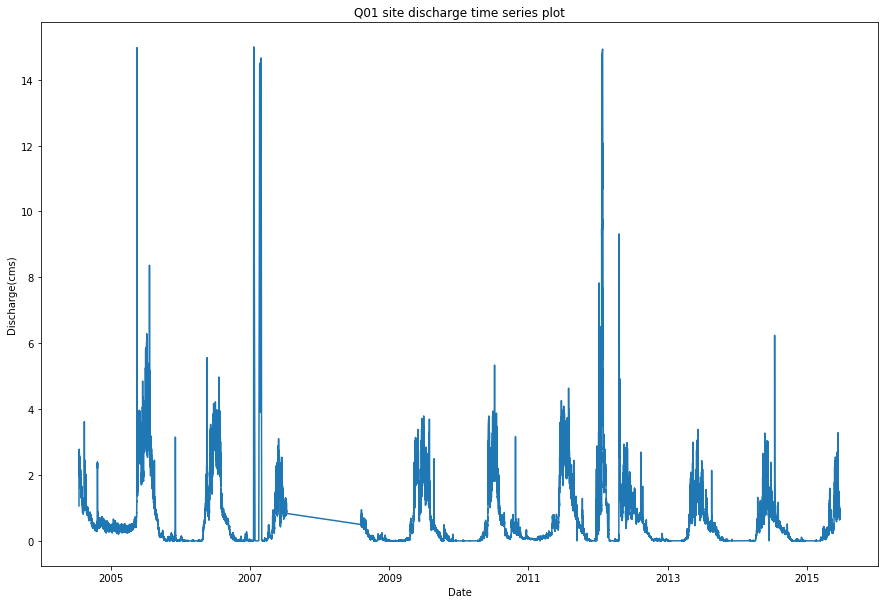

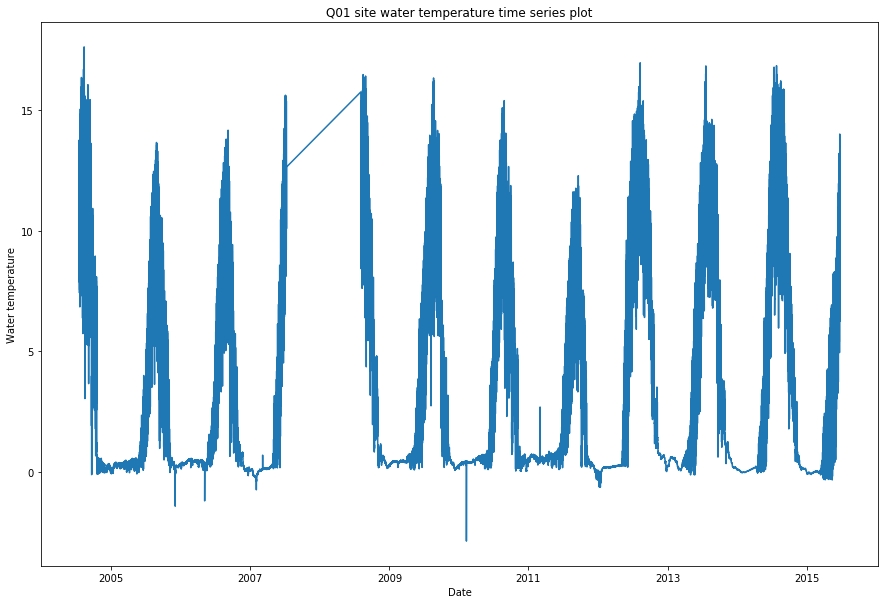

In [80]:
plt.figure(figsize=(15,10))
plt.plot(df_Q01_07['date_time(inGMT_PDTplus7)'],df_Q01_07[' estimated_discharge(cms)'])
plt.xlabel('Date')
plt.ylabel('Discharge(cms)')
plt.title('Q01 site discharge time series plot')

plt.figure(figsize=(15,10))
plt.plot(df_Q01_07['date_time(inGMT_PDTplus7)'],df_Q01_07[' water_temperature(deg_C)'])
plt.xlabel('Date')
plt.ylabel('Water temperature')
plt.title('Q01 site water temperature time series plot')

In [76]:
df_Q4=pd.read_csv('Tuolumne120_timeseries_stage_Q_T_2002_2015.csv',low_memory=False)

In [78]:
#Q4_Data missing value check and Data cleaning

print (df_Q4.isnull().sum())

date_time(UTC:LDT+7)                             0
 raw_pressure(cm)                                0
 barocorrected_pressure(cm)                      0
 offset(cm)                                      0
 stage(cm)                                       0
 estimated_discharge(cms)                        0
lower_confidence_discharge_cms_bestestimate    370
upper_confidence_discharge_cms_bestestimate    370
 instrument_ID                                   0
 water_temperature(deg_C)                        0
dtype: int64


In [79]:
df_Q4['date_time(UTC:LDT+7)']=pd.to_datetime(df_Q4['date_time(UTC:LDT+7)'])

Text(0.5,1,'Q04 site water temperature time series plot')

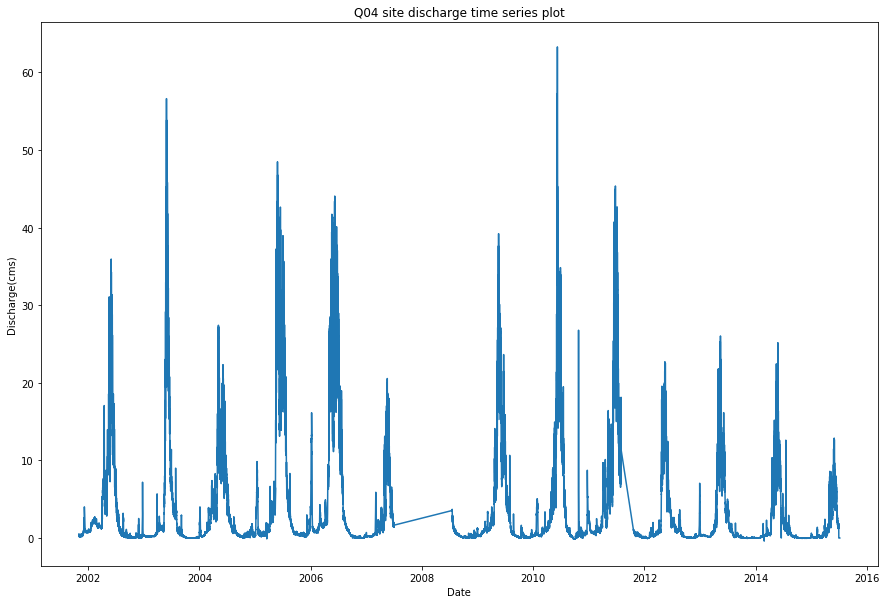

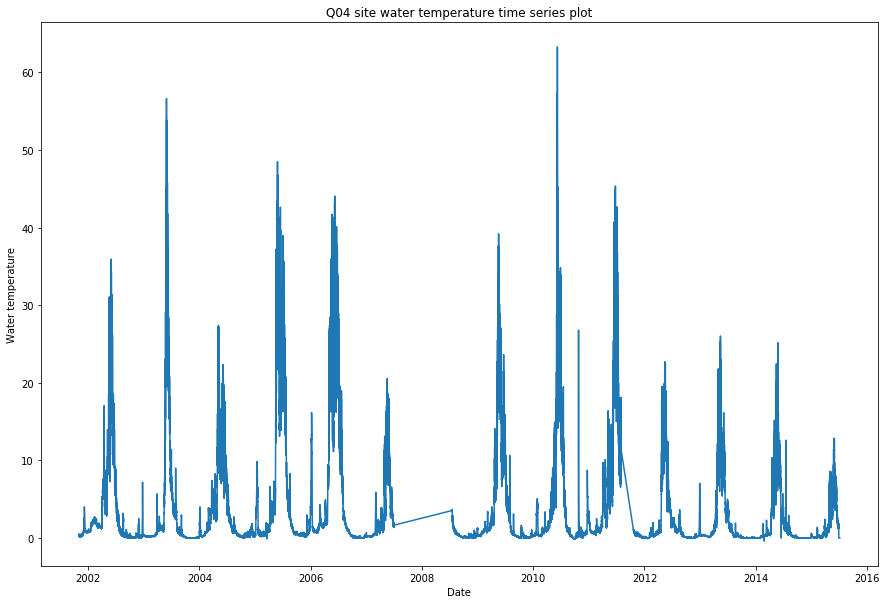

In [81]:
plt.figure(figsize=(15,10))
plt.plot(df_Q4['date_time(UTC:LDT+7)'],df_Q4[' estimated_discharge(cms)'])
plt.xlabel('Date')
plt.ylabel('Discharge(cms)')
plt.title('Q04 site discharge time series plot')

plt.figure(figsize=(15,10))
plt.plot(df_Q4['date_time(UTC:LDT+7)'],df_Q4[' estimated_discharge(cms)'])
plt.xlabel('Date')
plt.ylabel('Water temperature')
plt.title('Q04 site water temperature time series plot')

Discuss the quality of your data. Do you need to take into account any erroneous values or uncertain numbers before you start your statistics?

## A:

According to the data plotted above, we can tell that there are part of the time series data missed during the whole process, but the rest of them have a rather good quality. Before further data analysis, we also need to clean the dataset, remove some abnormal points or outliers in order to reduce the effects of these noises.